In [6]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [7]:
def data_plot(ax, X, BINW, DATA, ERRORLOW, ERRORUP, band=False, **kwargs):
    ax.errorbar(X, DATA, yerr= np.array([ERRORLOW,ERRORUP]), xerr = BINW/2.0, \
                            marker="o", markeredgewidth=0.5, capsize=1.0, markerfacecolor="black",\
                            markeredgecolor="black",ms=2, color='black', lw = 0.0, elinewidth=0.8, \
                            zorder=10, **kwargs)

In [8]:
def read_delayed_coincidence(root_file_path):
    with uproot.open(root_file_path) as root_file:
        delayed_coincidence_marley_tree = root_file["delayed_coincidence_marley_tree"]
        
        fracDelayed = delayed_coincidence_marley_tree["FracDelayed"].array()
        fracDelayedError = delayed_coincidence_marley_tree["FracDelayedError"].array()
        energies = delayed_coincidence_marley_tree["Energy"].array()
        
        return fracDelayed, fracDelayedError, energies

In [9]:
root_file_path = "/home/lane/Software/src/lumilar/system/analysis/data/delayed_coincidence_marley.root"
fracDelayed, fracDelayedError, energies = read_delayed_coincidence(root_file_path)

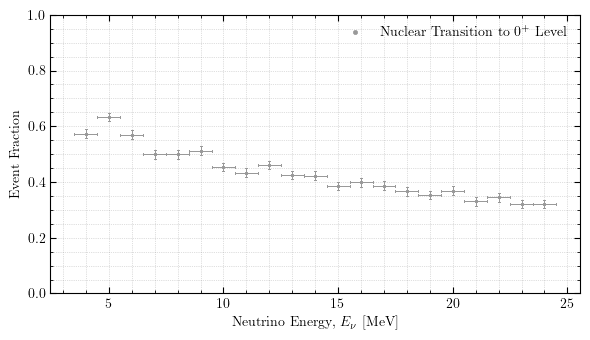

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Use TeX-style font rendering
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(6, 3.5))

color = '#999999'
for i in range(len(energies)):
    ax.errorbar(energies, fracDelayed, yerr=fracDelayedError, xerr=1/2.0,
                marker="o", markeredgewidth=0.5, capsize=1.0, markerfacecolor=color,
                markeredgecolor=color, ms=1, color=color, lw=0.0, elinewidth=0.4,
                zorder=10)

ax.set_xlabel(r"Neutrino Energy, $E_\nu$ [MeV]")
ax.set_ylabel(r"Event Fraction")

ax.set_ylim(0, 1)

# Set major and minor ticks to be inward
ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)

# Enable minor ticks on both axes
ax.minorticks_on()

line = ax.errorbar([], [], yerr=0.1, fmt='o', color=color, 
                       markeredgewidth=0.5, capsize=1.0, markerfacecolor=color,
                       markeredgecolor=color, ms=3, lw=0.0, elinewidth=0)
ax.legend(handles=line, labels=[f'Nuclear Transition to $0^+$ Level'], loc='upper right', fontsize=10, frameon=False)

# Grid
ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

plt.tight_layout()
plt.show()
